In [43]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
import tensorflow as tf
import pandas as pd
import numpy as np

In [163]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    int64  
 1   island             344 non-null    object 
 2   bill_length_mm     344 non-null    float64
 3   bill_depth_mm      344 non-null    float64
 4   flipper_length_mm  344 non-null    float64
 5   body_mass_g        344 non-null    float64
 6   sex                344 non-null    int64  
 7   year               344 non-null    int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 21.6+ KB


['Dream', 'Biscoe', 'Torgersen']

In [174]:
# Load a dataset into a Pandas Dataframe.
dataset_df = pd.read_csv("./tmp/penguins.csv")
dataset_df = dataset_df.fillna(0)

# Display the first 3 examples.
print(dataset_df.head(3))

print(list(set(dataset_df['species'])))
print(list(set(dataset_df['sex'])))
print(list(set(dataset_df['island'])))

species = np.array(list(set(dataset_df['species'])))
new_species = np.array([])

sex = np.array(['female', 'male'])
new_sex = np.array([])

islands = np.array(list(set(dataset_df['island'])))
new_isl = np.array([])

for idx in dataset_df.index:
    spe = dataset_df.loc[idx]['species']
    se = dataset_df.loc[idx]['sex']
    isl = dataset_df.loc[idx]['island']
    
    new_spe = np.where(species == spe)[0][0]
    new_isl = np.where(islands == isl)[0][0]
    if se != 0:
        new_se = np.where(sex == se)[0][0]
    else:
        new_se = 0
    
    new_species = np.append(new_species, new_spe)
    new_sex = np.append(new_sex, new_se)
    
dataset_df['species'] = new_species.astype('int64')
dataset_df['sex'] = new_sex.astype('int64')
dataset_df['island'] = new_isl.astype('int64')

dataset_df.info()

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   

   body_mass_g     sex  year  
0       3750.0    male  2007  
1       3800.0  female  2007  
2       3250.0  female  2007  
['Gentoo', 'Chinstrap', 'Adelie']
[0, 'female', 'male']
['Dream', 'Biscoe', 'Torgersen']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    int64  
 1   island             344 non-null    int64  
 2   bill_length_mm     344 non-null    float64
 3   bill_depth_mm      344 non-null    float64
 4   flipper_length_mm  344 non-null    float64
 5   body_mass_g        344 non-null    float64
 6

In [175]:
def df_to_dataset(dataframe, shuffle=True, batch_size=32):
  dataframe = dataframe.copy()
  labels = dataframe.pop('species')
  ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  return ds

In [176]:
train, test = train_test_split(dataset_df, test_size=0.2)
train, val = train_test_split(train, test_size=0.2)

batch_size = 5 # 예제를 위해 작은 배치 크기를 사용합니다.
train_ds = df_to_dataset(train, batch_size=batch_size)
val_ds = df_to_dataset(val, shuffle=False, batch_size=batch_size)
test_ds = df_to_dataset(test, shuffle=False, batch_size=batch_size)

In [177]:
X, y = dataset_df[dataset_df.columns.difference(['species'])],\
    dataset_df['species']

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

In [229]:
model = RandomForestClassifier(n_estimators=10, max_depth=3)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=10)

In [230]:
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print('학습 세트 정확도: {:.3f}'.format(train_score))
print('테스트 세트 정확도: {:.3f}'.format(test_score))

학습 세트 정확도: 0.953
테스트 세트 정확도: 0.988


In [231]:
model.predict(np.array([X_train.loc[0].values]))

/Users/formegusto/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([2])

In [232]:
y_train[0]

2

In [233]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:title={'center':'Feature Importances'}>

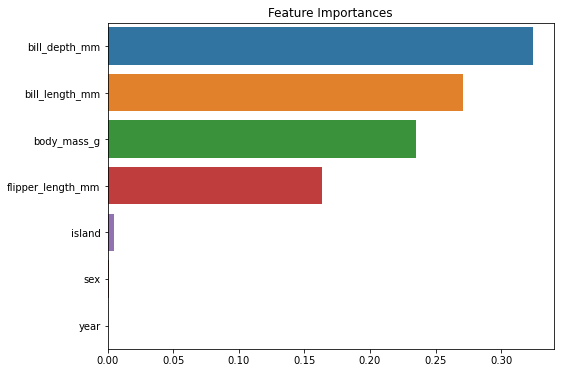

In [237]:
model_importances_values = model.feature_importances_
model_importances = pd.Series(model_importances_values, index=X_train.columns)
model_importances_sort = model_importances.sort_values(ascending=False)

plt.figure(figsize=(8,6))
plt.title("Feature Importances")
sns.barplot(x=model_importances_sort, y=model_importances.index)